<a href="https://colab.research.google.com/github/FrancescoCortopassi/copilot-codespaces-vscode/blob/main/LEZIONE_51_to_58.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LEZIONE_51: INTRO
In questa introduzione si specificano i due obiettivi di questo capitolo:

1.Capire, codificare ed ottimizzare la strategia Crossover con EMA
2. Strutturare ed utilizzare il Framework OOP


LEZIONE_52: EMA CROSSOVER STRATEGY- Overview

In [ ]:
ge

In [ ]:
#Creaiamo l'oggetto qf per sviluppare il grafico
qf=cf.QuantFig(df=ge.loc['2010':'2020'])

In [ ]:
#Aggiungiamo al grafico le due EMA
qf.add_ema(periods=20)
qf.add_ema(periods=50)

In [ ]:
#Plottiamo il grafico
qf.iplot(title='ge', name='ge')

LEZIONE_53: GETTING DATA

In [ ]:
#Otteniamo i dati necessari e carichiamo le librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data=pd.read_csv('/content/eurusd.csv',parse_dates=['Date'],index_col='Date')

data

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


<Axes: title={'center': 'EUR/USD'}, xlabel='Date'>

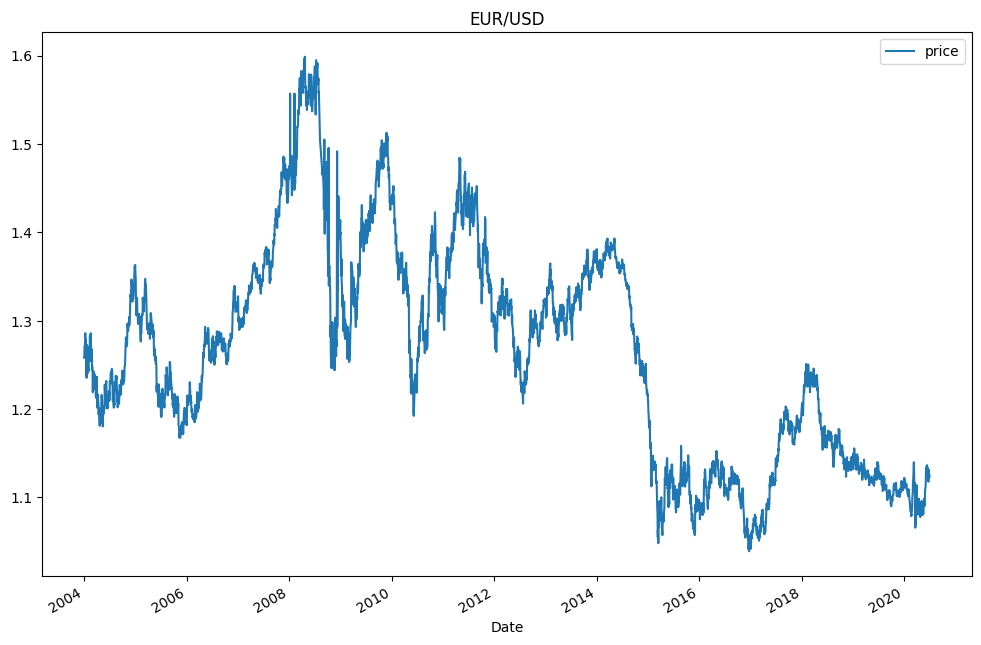

In [ ]:
#Plotting
data.plot(figsize=(12,8), title='EUR/USD')

LEZIONE_54: EMA vs SMA

In [ ]:
#Visualizziamo i dati row
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [ ]:
#creaiamo la variabile window con il valore scelto
window=50

In [ ]:
data.price.ewm(span=window).mean()

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.261836
2004-01-06,1.264559
2004-01-07,1.264458
...,...
2020-06-24,1.109674
2020-06-25,1.110279
2020-06-26,1.110746


In [ ]:
#Creiamo le due medie Mobili esponenziali
data['EMA_S']=data['price'].ewm(span=window).mean()
data['SMA_S']=data["price"].rolling(window=window).mean()

In [ ]:
data

,price,EMA_S,SMA_S
Date,,,
2004-01-01,1.258194,1.258194,NaN
2004-01-02,1.258194,1.258194,NaN
2004-01-05,1.268698,1.261836,NaN
2004-01-06,1.272103,1.264559,NaN
2004-01-07,1.264095,1.264458,NaN
...,...,...,...
2020-06-24,1.131235,1.109674,1.101794
2020-06-25,1.125087,1.110279,1.102486
2020-06-26,1.122208,1.110746,1.103213


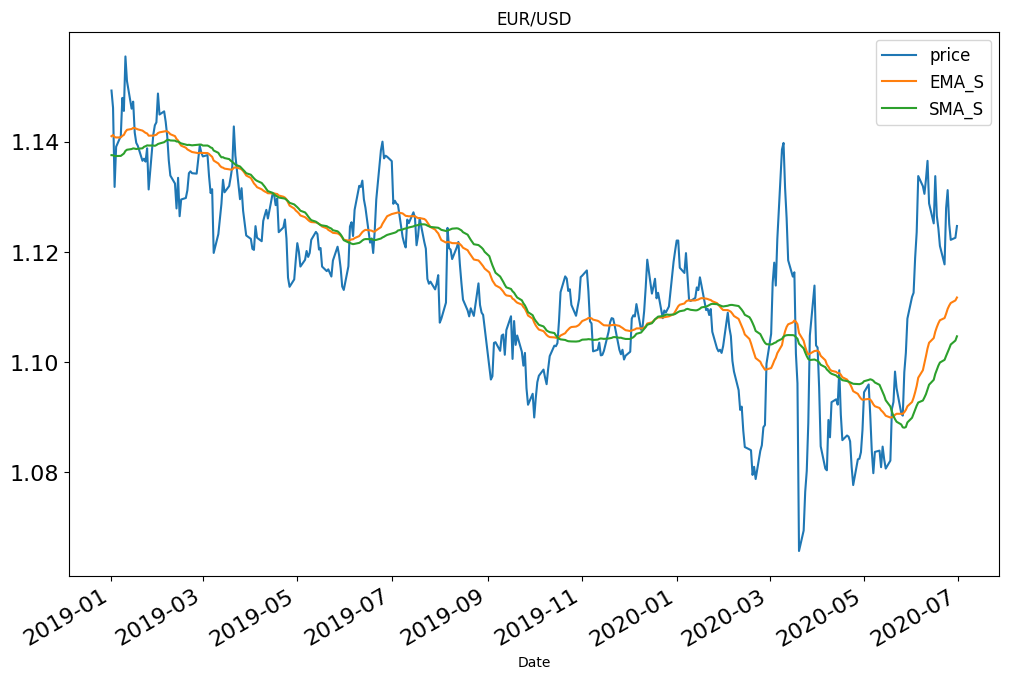

In [ ]:

data.loc["2019":].plot(figsize=(12,8),title='EUR/USD',fontsize=16)
plt.legend(fontsize=12)
plt.show()

LEZIONE_55: DEFYNING AN EMA CROSSOVER STRATEGY

In [ ]:
#data.drop(columns=['EMA_S','SMA_S'],inplace=True)

data

,price,EMA_S,SMA_S
Date,,,
2004-01-01,1.258194,1.258194,NaN
2004-01-02,1.258194,1.258194,NaN
2004-01-05,1.268698,1.261836,NaN
2004-01-06,1.272103,1.264559,NaN
2004-01-07,1.264095,1.264458,NaN
...,...,...,...
2020-06-24,1.131235,1.109674,1.101794
2020-06-25,1.125087,1.110279,1.102486
2020-06-26,1.122208,1.110746,1.103213


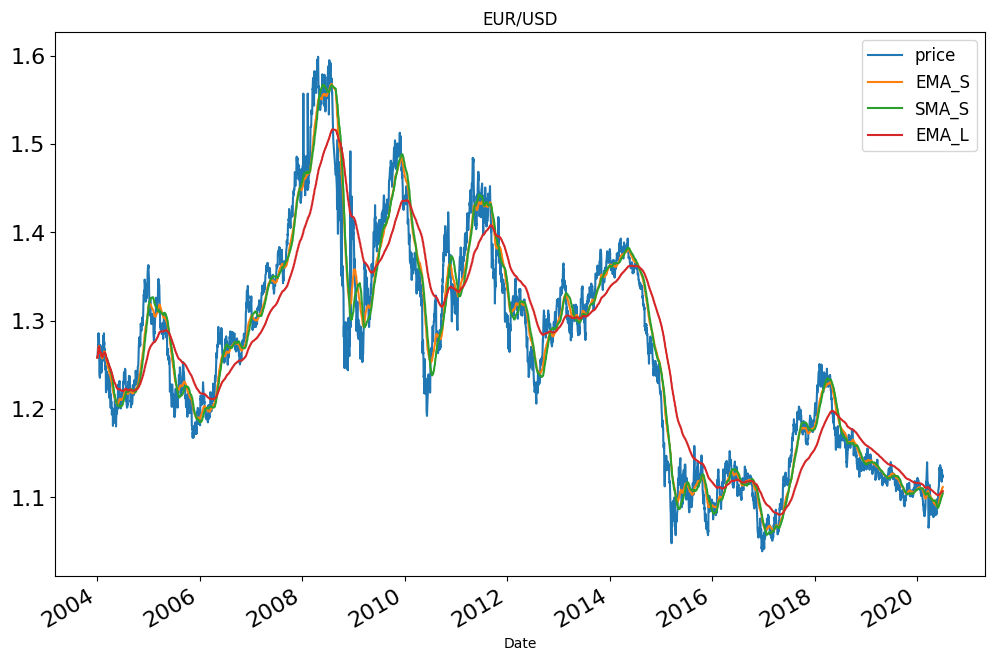

In [ ]:
#
ema_s = 50
ema_l = 200

# Calculate EMA and SMA for the 'price' column specifically
data['EMA_S'] = data['price'].ewm(span=ema_s).mean()
data['EMA_L'] = data['price'].ewm(span=ema_l).mean()

data.plot(figsize=(12, 8), title='EUR/USD', fontsize=16)
plt.legend(fontsize=12)
plt.show()

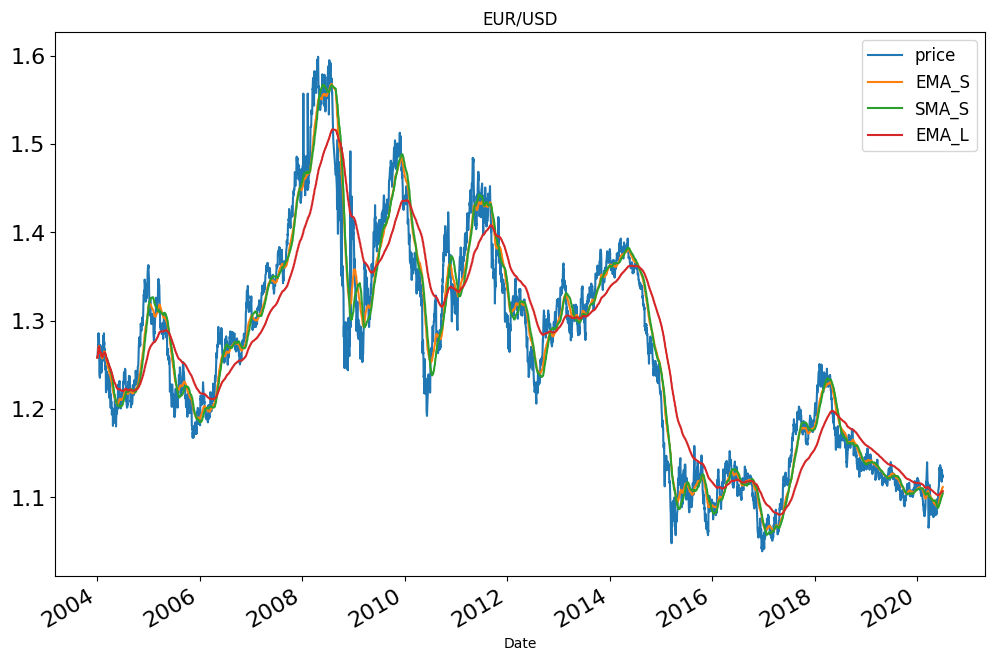

In [ ]:
data.plot(figsize=(12,8),title='EUR/USD',fontsize=16)
plt.legend(fontsize=12)



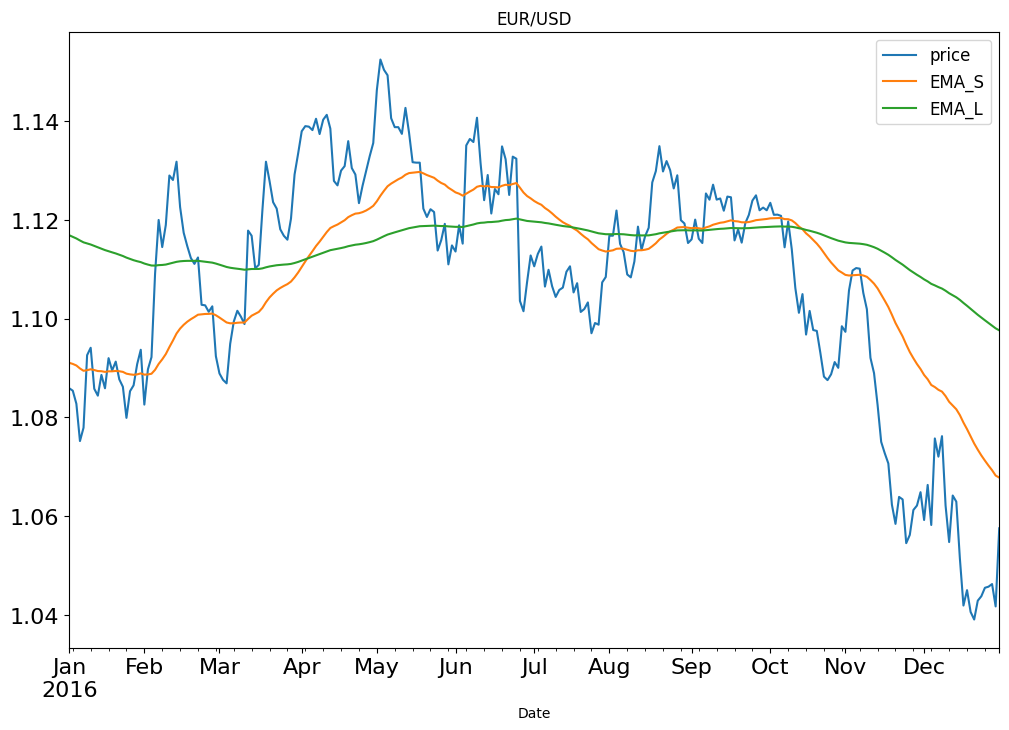

In [ ]:
data.loc["2016",["price","EMA_S","EMA_L"]].plot(figsize=(12,8),title='EUR/USD',fontsize=16)
plt.legend(fontsize=12)

In [ ]:
#creiamo la colonna in cui inserire le posizioni BUY/SHORT
data["position"]=np.where(data["EMA_S"]>data["EMA_L"],1,-1)
data

,price,EMA_S,SMA_S,EMA_L,position
Date,,,,,
2004-01-01,1.258194,1.258194,NaN,1.258194,-1
2004-01-02,1.258194,1.258194,NaN,1.258194,-1
2004-01-05,1.268698,1.261836,NaN,1.261730,1
2004-01-06,1.272103,1.264559,NaN,1.264362,1
2004-01-07,1.264095,1.264458,NaN,1.264308,1
...,...,...,...,...,...
2020-06-24,1.131235,1.109674,1.101794,1.106470,1
2020-06-25,1.125087,1.110279,1.102486,1.106655,1
2020-06-26,1.122208,1.110746,1.103213,1.106810,1


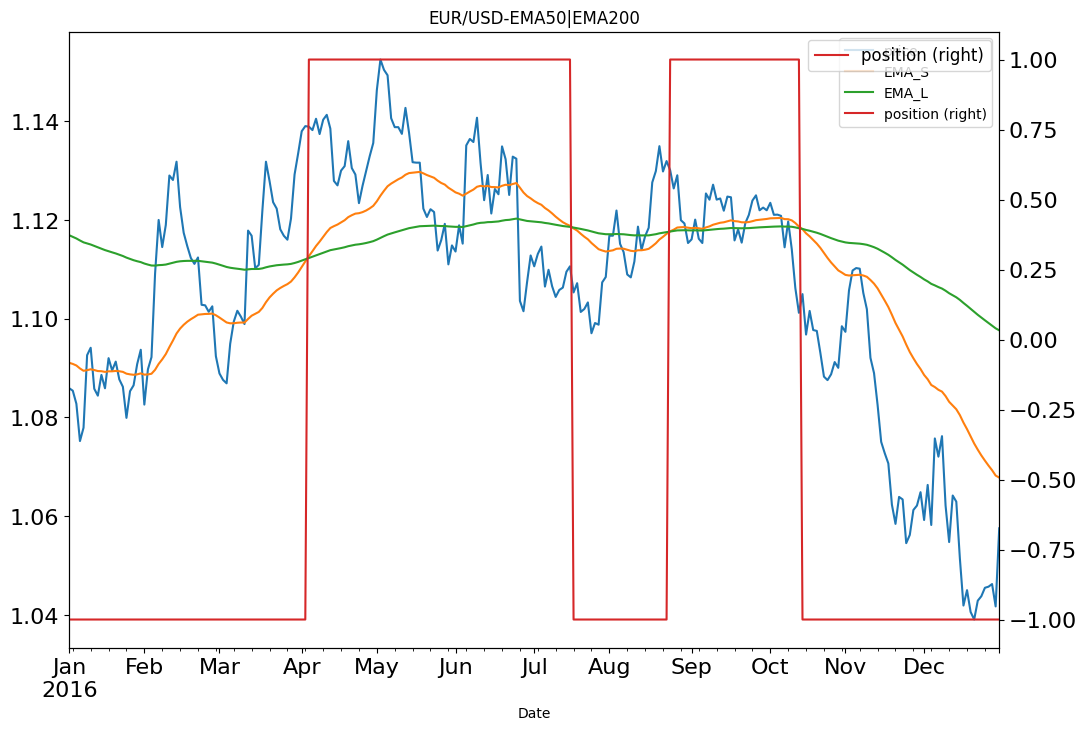

In [ ]:
#Plottiamo il grafico con le due EMA e le posizioni (1,-1)
data.loc["2016",["price","EMA_S","EMA_L","position"]].plot(figsize=(12,8),fontsize=16,secondary_y='position',title='EUR/USD-EMA{}|EMA{}'.format(ema_s,ema_l))
plt.legend(fontsize=12)

In [ ]:
data

,price,EMA_S,SMA_S,EMA_L,position
Date,,,,,
2004-01-01,1.258194,1.258194,NaN,1.258194,-1
2004-01-02,1.258194,1.258194,NaN,1.258194,-1
2004-01-05,1.268698,1.261836,NaN,1.261730,1
2004-01-06,1.272103,1.264559,NaN,1.264362,1
2004-01-07,1.264095,1.264458,NaN,1.264308,1
...,...,...,...,...,...
2020-06-24,1.131235,1.109674,1.101794,1.106470,1
2020-06-25,1.125087,1.110279,1.102486,1.106655,1
2020-06-26,1.122208,1.110746,1.103213,1.106810,1


In [ ]:
#Creiamo la colonna 'returns' con np.log(logaritmo)
data['returns']=np.log(data.price.div(data.price.shift(1)))

In [ ]:
data

,price,EMA_S,SMA_S,EMA_L,position,returns
Date,,,,,,
2004-01-01,1.258194,1.258194,NaN,1.258194,-1,NaN
2004-01-02,1.258194,1.258194,NaN,1.258194,-1,0.000000
2004-01-05,1.268698,1.261836,NaN,1.261730,1,0.008313
2004-01-06,1.272103,1.264559,NaN,1.264362,1,0.002681
2004-01-07,1.264095,1.264458,NaN,1.264308,1,-0.006315
...,...,...,...,...,...,...
2020-06-24,1.131235,1.109674,1.101794,1.106470,1,0.002892
2020-06-25,1.125087,1.110279,1.102486,1.106655,1,-0.005449
2020-06-26,1.122208,1.110746,1.103213,1.106810,1,-0.002562


In [ ]:
data.dropna(inplace=True)

In [ ]:
data

,price,EMA_S,SMA_S,EMA_L,position,returns
Date,,,,,,
2004-03-10,1.223197,1.252049,1.257291,1.256090,-1,-0.007095
2004-03-11,1.235102,1.251285,1.256829,1.255567,-1,0.009686
2004-03-12,1.222404,1.249991,1.256113,1.254753,-1,-0.010334
2004-03-15,1.227205,1.248975,1.255283,1.254087,-1,0.003919
2004-03-16,1.226106,1.247962,1.254363,1.253420,-1,-0.000896
...,...,...,...,...,...,...
2020-06-24,1.131235,1.109674,1.101794,1.106470,1,0.002892
2020-06-25,1.125087,1.110279,1.102486,1.106655,1,-0.005449
2020-06-26,1.122208,1.110746,1.103213,1.106810,1,-0.002562


In [ ]:
data['strategy']=data['position'].shift(1)*data['returns']

In [ ]:
data

,price,EMA_S,SMA_S,EMA_L,position,returns,strategy
Date,,,,,,,
2004-03-10,1.223197,1.252049,1.257291,1.256090,-1,-0.007095,NaN
2004-03-11,1.235102,1.251285,1.256829,1.255567,-1,0.009686,-0.009686
2004-03-12,1.222404,1.249991,1.256113,1.254753,-1,-0.010334,0.010334
2004-03-15,1.227205,1.248975,1.255283,1.254087,-1,0.003919,-0.003919
2004-03-16,1.226106,1.247962,1.254363,1.253420,-1,-0.000896,0.000896
...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.109674,1.101794,1.106470,1,0.002892,0.002892
2020-06-25,1.125087,1.110279,1.102486,1.106655,1,-0.005449,-0.005449
2020-06-26,1.122208,1.110746,1.103213,1.106810,1,-0.002562,-0.002562


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ... your existing code for loading and processing data ...

#Creiamo la colonna con i trades,
#che si aprono ogni volta che la
#posizione cambia da 1 a -1(o viceversa )
data['trades']=data.position.diff().fillna(0).abs()

#Controlliamo sempre le variazioni implementate nel DaatFrame
data.tail(40)

data.trades.value_counts()

pct=0.0007

#Creiamo la colonna con i trades netti, ovvero sottraendo
#il costo della commissione pct
data['strategy_net']=data['strategy']-data['trades']*pct # This line creates the 'strategy_net' column

data['creturns']=data['returns'].cumsum().apply(np.exp)
data['cstrategy']=data['strategy'].cumsum().apply(np.exp)
data['cstrategy_net']=data['strategy_net'].cumsum().apply(np.exp) # Now this line can access 'strategy_net'

# ... the rest of your code ...

<Axes: title={'center': 'EUR/USD-EMA50|EMA200'}, xlabel='Date'>

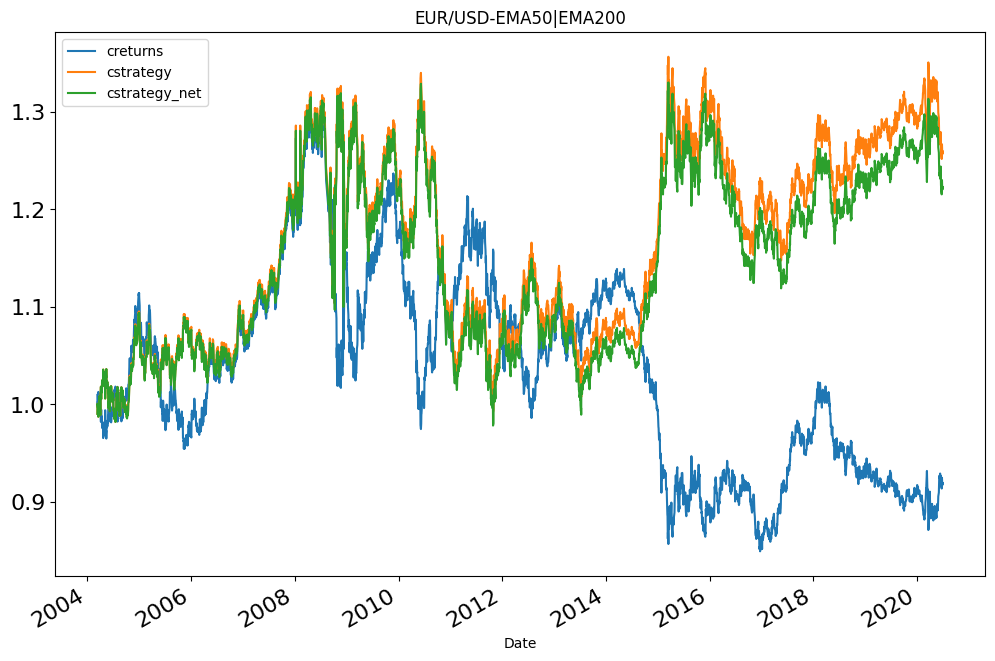

In [ ]:
#Plottiamo il grafico con i ritorni cumulativi
data[['creturns', 'cstrategy', 'cstrategy_net']].plot(figsize=(12, 8), fontsize=16, title='EUR/USD-EMA{}|EMA{}'.format(ema_s, ema_l))

BONUS_PERSONALE: ESEMPI DI LOGARITMI
Non ho per il momento il background necessario a comprendere il concetto di logaritmo naturale e perché quest'ultimo arrechi vantaggi nel calcolo dei ritorni di una strategia rispetto alRendimento Semplice calcolando il cambiamento di prezzo percentuale

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Crea valori e i loro logaritmi naturali
x_values = np.linspace(1, 20, 400)
ln_values = np.log(x_values)

# Disegna il grafico
plt.figure(figsize=(8, 5))
plt.plot(x_values, ln_values, label='ln(x)', color='green')
plt.scatter([np.e, np.e**2], [1, 2], color='red', zorder=5)
plt.text(np.e, 1.1, 'ln(e) = 1', ha='center')
plt.text(np.e**2, 2.1, 'ln(e²) = 2', ha='center')

# Etichette e griglia
plt.title('Logaritmo naturale: ln(x)')
plt.xlabel('x')
plt.ylabel('ln(x)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Prezzi fittizi (puoi modificarli!)
prezzi = [100, 110, 121]

# Creiamo un DataFrame
data = pd.DataFrame({'Prezzo': prezzi})

# Calcolo dei rendimenti
data['Rendimento semplice'] = data['Prezzo'].pct_change()
data['Rendimento logaritmico'] = np.log(data['Prezzo'] / data['Prezzo'].shift(1))

# Rendimento totale
rendimento_totale_semplice = (data['Prezzo'].iloc[-1] - data['Prezzo'].iloc[0]) / data['Prezzo'].iloc[0]
rendimento_totale_log = np.log(data['Prezzo'].iloc[-1] / data['Prezzo'].iloc[0])

# Risultati
print(data)
print("\nTotale rendimento semplice: {:.2%}".format(rendimento_totale_semplice))
print("Totale rendimento logaritmico: {:.4f} (≈ {:.2%})".format(
    rendimento_totale_log, np.exp(rendimento_totale_log) - 1))

LEZIONE_57: VECTORIZED STRATEGY BACKTESTER

La Challenge propone di andare a trasformare ila Classe di SMABacktest creata nelle lezioni precedenti in una EMABacktester

In [156]:
class EMABacktester():
  def __init__(self,symbol,EMA_S,EMA_L,start,end):
    self.symbol=symbol
    self.EMA_S=SMA_S
    self.EMA_L=SMA_L
    self.start=start
    self.end=end
    self.results= None
    self.data = None
    #self.get_data = None

  def get_data(self):
    raw=pd.read_csv("/content/forex_pairs.csv",parse_dates=["Date"], index_col="Date")
    raw = raw[self.symbol].to_frame().dropna()  # Fix: Removed extra raw
    raw = raw.loc["2004-01-01":self.end].copy()  # Fix: Use self.start and self.end
    raw = raw.rename(columns={self.symbol:"price"})  # Fix: Removed inplace=True
    raw["return"]=np.log(raw["price"]/raw["price"].shift(1))
    raw["EMA_S"]=raw["price"].ewm(span=self.SMA_S,min_period=self.EMA_S).mean()
    raw["EMA_S"]=raw["price"].ewm(span=self.SMA_L,min_period=self.EMA_L).mean()
    self.data=raw
    return raw

  def set_parameters(self,EMA_S=None,EMA_L=None):
    if SMA_S is not None:
      self.SMA_S=SMA_S
      self.data["EMA_S"]=self.data["price"].ewm(span=self.EMA_S).mean()
    if SMA_L is not None:
      self.SMA_L=SMA_L
      self.data["SMA_L"]=self.data["price"].ewm(span=self.EMA_L).mean()

  def test_strategy(self):
    data=self.data.copy().dropna()
    data["position"]=np.where(data["EMA_S"]>data["EMA_L"],1,-1)
    data["strategy"]=data["position"].shift(1) * data["return"]
    data.dropna(inplace= True)
    data["creturns"]=data["return"].cumsum().apply(np.exp) # Fix: Use data["return"] instead of data["returns"]
    data["cstrategy"]=data["strategy"].cumsum().apply(np.exp)
    perf = data["cstrategy"].iloc[-1] #absolute performance
    outperf = perf-data["creturns"].iloc[-1] #outperformance
    self.results = data[["creturns", "cstrategy"]] # Store results for plotting
    return round(perf,6),round(outperf,6)

     # Define plot_results method within the class
  def plot_results(self):
    if self.results is None:
      print ("Nessun risultato da plottare adesso. Ripeti il test")
    else:
      title="{} | EMA_S={} | EMA_L={}".format(self.symbol,self.SMA_S,self.SMA_L)
      self.results[["creturns","cstrategy"]].plot(title=title,figsize=(12,8))

  def update_and_run(self,EMA):
    self.set_parameters(int(SMA[0]),int(SMA[1]))
    return self.test_strategy()[0]

  def optimize_parameters (self, EMA_S_range, EMA_L_range):
    opt=brute(self.update_and_run,((EMA_S_range[0],EMA_S_range[1]),(EMA_L_range[0],EMA_L_range[1])),finish=None)
    return opt

LEZIONE_58:OOP-EMA Backtester IN ACTION

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute

In [168]:
from EMABacktester import EMABacktester

In [169]:
#Con pct si intendono i PROPORTIONAL TRADING COSTS che ci serviranno per calcolare il
#ritorno cumulativo netto di una strategia
pct=0.0007

In [172]:
#Adesso dovremmo essere in grado di utilizzare la nostra classe di Backtest per
#valutare la bontà della strategia ma qualcosa non sta funzionando
#DA VERIFICARE IN FASE DI RIPASSO

In [171]:
tester=EMABacktester("eurusd.csv",50,200,"2004-01-01","2020-06-30",pct)

In [ ]:
tester

In [ ]:
tester.test_strategy()

In [ ]:
tester.plot_results()

In [ ]:
tester.optimize_parameters((20,200),(20,200))

In [ ]:
tester.plot_results()